<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>

Here is some simple content for this page.
[{'title': 'Marokkos letzte Juden werden unsichtbar', 'title_detail': {'type': 'text/plain', 'language': None, 'base': 'https://www.nzz.ch/startseite.rss', 'value': 'Marokkos letzte Juden werden unsichtbar'}, 'summary': 'In Casablanca wohnen so viele Jüdinnen und Juden wie sonst nirgends in der arabischen Welt. Doch seit dem Überfall der Hamas auf Israel steigt der Druck auf die Gemeinde.', 'summary_detail': {'type': 'text/html', 'language': None, 'base': 'https://www.nzz.ch/startseite.rss', 'value': 'In Casablanca wohnen so viele Jüdinnen und Juden wie sonst nirgends in der arabischen Welt. Doch seit dem Überfall der Hamas auf Israel steigt der Druck auf die Gemeinde.'}, 'media_thumbnail': [{'width': '200', 'height': '200', 'url': 'https://img.nzz.ch/2024/01/17/cf916b7e-e963

/tmp/ipykernel_1009/2653830323.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'].iloc[3] = np.nan
/tmp/ipykernel_1009/2653830323.py:59: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear')


Spalte Price Anteil an Outliers = 7.18%
Spalte Area Anteil an Outliers = 3.23%


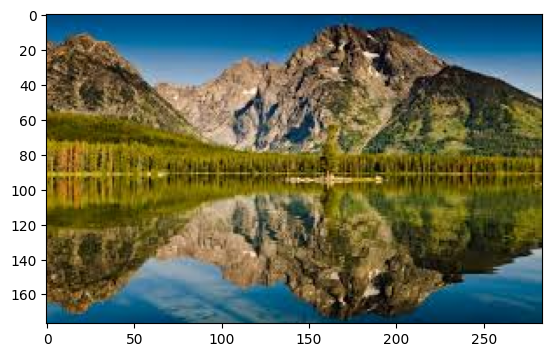

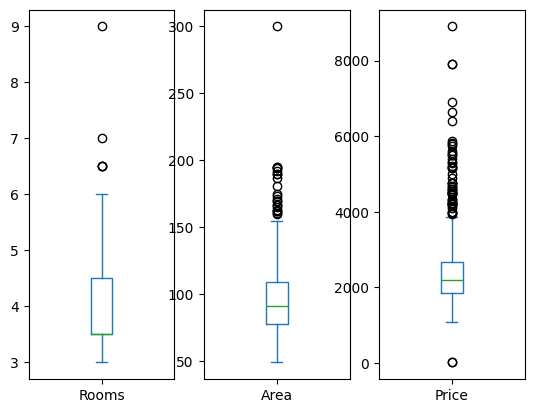

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SQL
import sqlite3
conn = sqlite3.connect('apartment_database.db') 
cursor = conn.cursor()
cursor.execute('''SELECT * FROM apartments_table WHERE Rooms >= 3.0''')
df = pd.DataFrame(cursor.fetchall(), columns=['OrderId','Rooms','Area','Price'])
df.to_sql('appartments', conn, if_exists='replace')
cursor.execute("UPDATE appartments SET Rooms = 10 WHERE OrderId = '1662023695-433'")
cursor.execute("INSERT INTO appartments (OrderId, Rooms) VALUES (10, 100)")
cursor.execute("DELETE FROM appartments WHERE Rooms > 11")
conn.commit()
dfr = pd.read_sql("select min(rooms), avg(rooms) from appartments ORDER BY Rooms desc", con=conn)

# MongoDB
'''
db.orders.aggregate([
  {
    "$lookup": {
      "from": "inventory",
      "localField": "item",
      "foreignField": "sku",
      "as": "inventory_docs"
    }
  }
])
'''


# Request
import feedparser
import requests
from bs4 import BeautifulSoup
import lxml.html
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
print(BeautifulSoup(page.content, 'html.parser').prettify()) # nice HTML
print(lxml.html.fromstring(page.text).xpath('//p[1]')[0].text_content()) # also .tag or .getparent()
print(feedparser.parse("https://www.nzz.ch/startseite.rss").entries)

# Files
import PyPDF2
data = pd.read_csv("example.csv", sep=";", encoding='utf-8')
data = pd.read_json("example.json")
data = pd.read_csv("archive.zip", sep=";")
data = pd.read_excel("example.xlsx", sheet_name = "sheet1")
text = PyPDF2.PdfReader(open('example.pdf', 'rb')).pages[0].extract_text()
image = plt.imread('example.jpeg')
plt.imshow(image)

# Pandas
df.info() # tech
df.describe() # stats
df.plot(kind="box", subplots=True)
df.merge(data, left_on='Price', right_on='Var1')
df['Price'].iloc[3] = np.nan
df.interpolate(method='linear')
df.duplicated().sum()
df.drop_duplicates()
df.rename(columns={'Rooms': 'rooms'})
df.drop(columns=['Rooms'])
df.dropna()
df.shape # (entries, columns)
df['Price'].kurtosis() # high = heavy tails
df['Price'].skew()

# Outliers
for label, content in df[['Price', 'Area']].dropna().items():
    Q1 = content.quantile(0.25)
    Q3 = content.quantile(0.75)
    IQR = Q3 - Q1
    v_col = content[(content <= Q1 - 1.5 * IQR) | (content >= Q3 + 1.5 * IQR)]
    perc = (len(v_col) / len(df)) * 100
    print("Spalte {} Anteil an Outliers = {}%".format(label, round(perc, 2)))


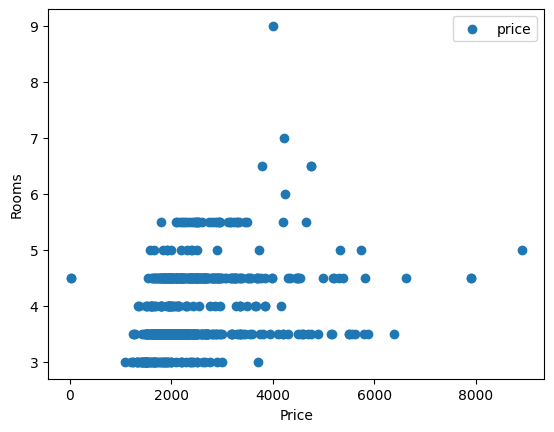

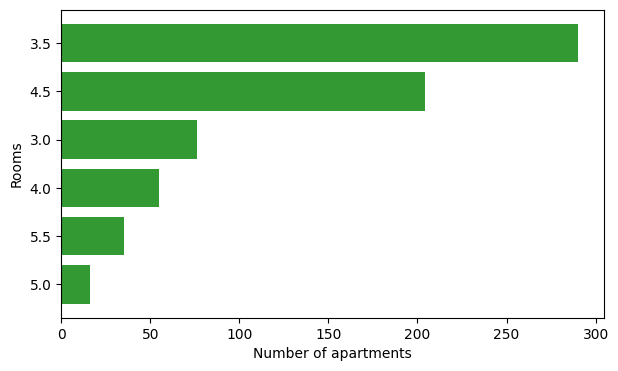

In [101]:
# Charts
price = plt.scatter(df['Price'], df['Rooms'])
plt.xlabel('Price')
plt.ylabel('Rooms')
plt.legend(handles=[price], labels = ['price'])

df_bar = df['Rooms'].value_counts().nlargest(6).sort_values(ascending=True)
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

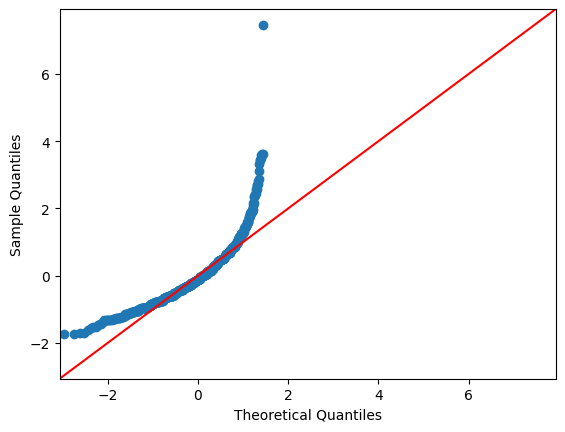

In [102]:
# QQ
import statsmodels.api as sm
import pylab as py
# red line normal distrib
df['var'] = (df['Area']-df['Area'].mean()) / df["Area"].std()
sm.qqplot(df['var'], line ='45')
py.show()

[2]


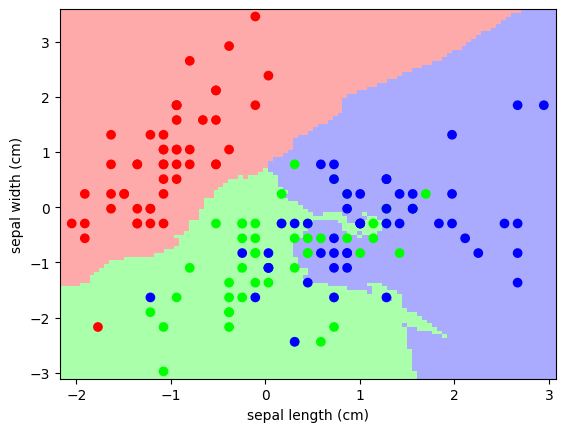

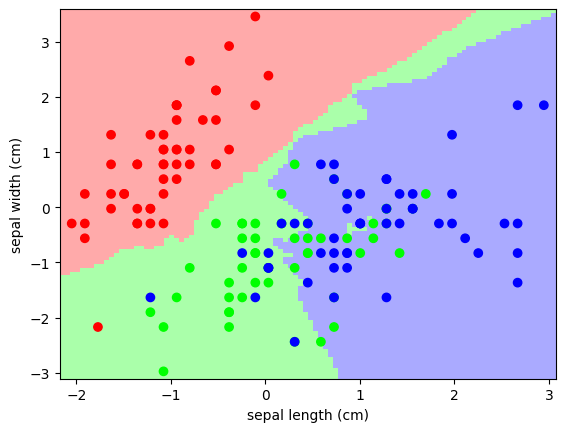

In [103]:
# KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pylab as pl
from matplotlib.colors import ListedColormap

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)    
X_test_scaled = scaler.fit_transform(X_test)        
X_scaled = scaler.transform(X)

# n small: sensitive to noise
# n large: smooth but underfit
model_class = KNeighborsClassifier(n_neighbors = 7)
model_class.fit(X_train_scaled, y_train)
model_reg = KNeighborsRegressor(n_neighbors = 7) # this is wrong (target variable is class)
model_reg.fit(X_train_scaled, y_train)

print(model_class.predict([[1234, 1234]])) 


# Not important
def plot_iris_knn(knn, X, y):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('sepal length (cm)')
    pl.ylabel('sepal width (cm)')
    pl.axis('tight')
    
plot_iris_knn(model_class, X_scaled, y)
plot_iris_knn(model_reg, X_scaled, y)

In [104]:
# Sample generation
import random
p_mean = 2800
p_std = 240
p_n = 25000

pop = np.random.normal(loc=p_mean, scale=p_std, size=p_n)
sample_size = 1000
random_sample = random.sample(list(pop), sample_size)

Accuracy: 0.7105
[0.625  0.5    0.5    0.5714 0.5714]


<Axes: ylabel='features'>

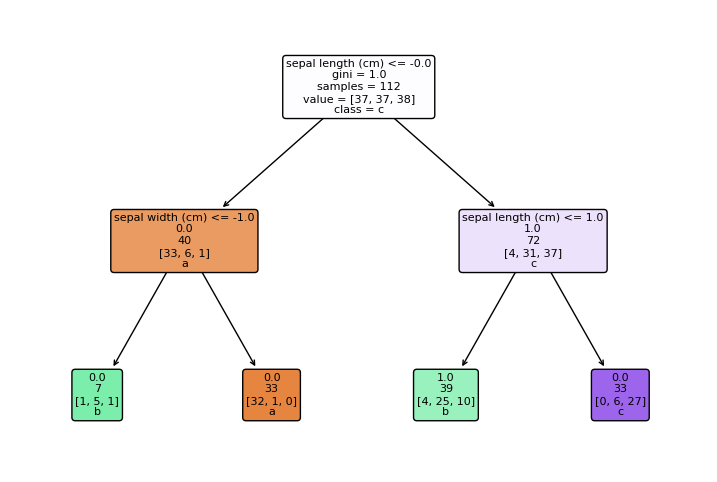

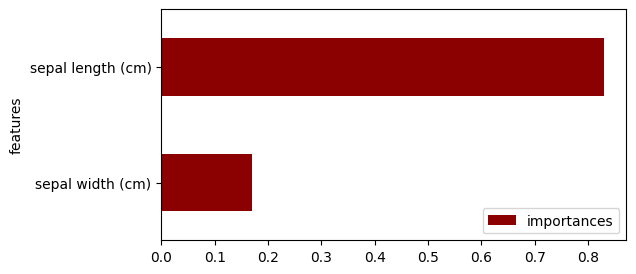

In [105]:
# Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(random_state=20, max_depth=2)
model = model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')

cv = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring='accuracy')
print(cv.round(4))

fig = plt.figure(figsize=(9,6))
tree_plot = plot_tree(model, 
                   feature_names=list(X.columns),  
                   class_names=['a', 'b', 'c'],
                   filled=True,
                   fontsize=8,
                   rounded=True,
                   label='root',
                   precision=0)


df_fi = pd.DataFrame({'features':X.columns,'importances': model.feature_importances_})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

In [112]:

from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
X, y = make_regression(n_features=4, n_informative=2, random_state=5, shuffle=False)

reg_rf = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
reg_rf.fit(X_train, y_train)
print(reg_rf.score(X_test, y_test).round(4)) # R-squared

reg_rf.predict([[1, 1]])

0.612


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.292])

In [147]:
# Linear Regression
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X[:,2:5], y, random_state=0)

model = LinearRegression() # SGDRegressor(max_iter=1000000, eta0=0.01)
model.fit(X_train, y_train)
print('Parameters (theta_1, theta_2, theta_3, theta_0): \n', model.coef_, model.intercept_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, model.predict(X_test)))

# Manual
eta = 0.1  # learning rate
n_iterations = 100000 #try with 1000, 10000, 100000...
N = len(X)
theta_0 = np.random.randn(1) # random initialization
theta_1 = np.random.randn(1)
theta_2 = np.random.randn(1)
theta_3 = np.random.randn(1)
X1= X_train[:,0]
X2= X_train[:,1]
X3= X_train[:,2]
for iteration in range(n_iterations):
    gradient_theta_3 = 1/N * np.sum((theta_0 + theta_1*X1 + theta_2*X2 + theta_3*X3  - y_train)*X3)
    gradient_theta_2 = 1/N * np.sum((theta_0 + theta_1*X1 + theta_2*X2 + theta_3*X3  - y_train)*X2)
    gradient_theta_1 = 1/N * np.sum((theta_0 + theta_1*X1 + theta_2*X2 + theta_3*X3  - y_train)*X1)
    gradient_theta_0 = 1/N * np.sum((theta_0 + theta_1*X1 + theta_2*X2 + theta_3*X3  - y_train))
    
    theta_3 = theta_3 - eta * gradient_theta_3
    theta_2 = theta_2 - eta * gradient_theta_2                                
    theta_1 = theta_1 - eta * gradient_theta_1
    theta_0 = theta_0 - eta * gradient_theta_0
print(theta_1,theta_2,theta_3, theta_0)

Parameters (theta_1, theta_2, theta_3, theta_0): 
 [848.65812819 375.94724907  39.83946649] 153.39594722134203
Mean squared error: 3730.87
[848.64641925] [375.95964366] [39.83941067] [153.39594391]


theta_1:  [[4.05338839]]
theta_0:  [0.80016997]


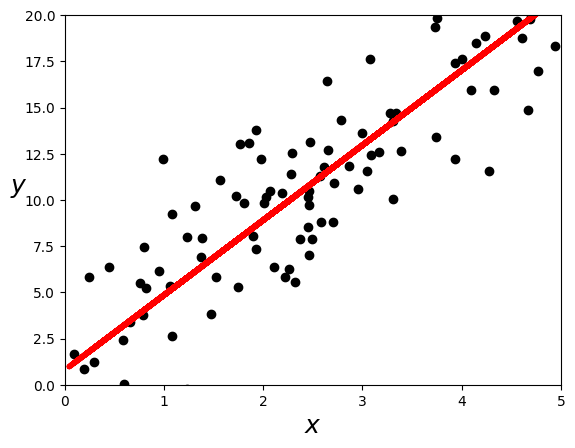

In [145]:
X = 5 * np.random.rand(100, 1) 
y = 1 + 4 * X + 3*np.random.randn(100, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("theta_1: ", lin_reg.coef_)
print("theta_0: ", lin_reg.intercept_) 
ypred_exact = lin_reg.coef_ * X + lin_reg.intercept_

plt.scatter(X, y, color = 'black' )
plt.plot(X, ypred_exact, color = 'red', lw = 4)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 5, 0, 20])
plt.show()

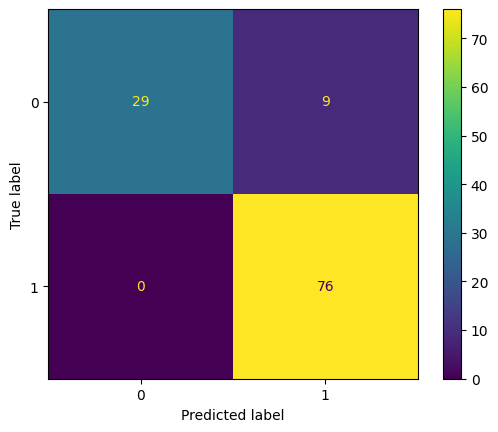

In [150]:
# Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
cancer_X = cancer_data.data[:,[3,4,5]]#mean area, mean smoothness and mean compactness.
cancer_y = cancer_data.target

cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(cancer_X, cancer_y, test_size=0.20, random_state = 99)

scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train)
cancer_X_test = scaler.transform(cancer_X_test)

log_reg = LogisticRegression()
log_reg.fit(cancer_X_train, cancer_y_train)
y_pred = log_reg.predict(cancer_X_test)

cm = confusion_matrix(cancer_y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
disp.plot()
plt.show()

Epoch 1/10
30/30 [==============================] - 1s 5ms/step - loss: 0.6773 - accuracy: 0.5597 - val_loss: 0.6392 - val_accuracy: 0.7133
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.7212 - val_loss: 0.5897 - val_accuracy: 0.7933
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.7983 - val_loss: 0.5468 - val_accuracy: 0.8267
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.5339 - accuracy: 0.8405 - val_loss: 0.5047 - val_accuracy: 0.8667
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.8828 - val_loss: 0.4627 - val_accuracy: 0.8733
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.9018 - val_loss: 0.4243 - val_accuracy: 0.8933
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.9102 - val_loss: 0.3889 - val_accuracy: 0.9067
Epoch 8/10
30/30 [==

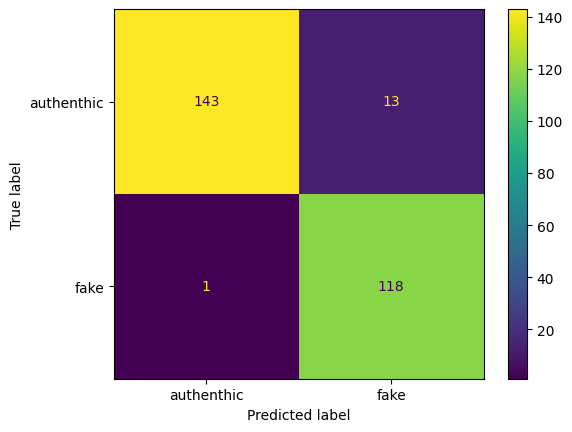

In [158]:
# NNs
import tensorflow as tf
df_banknote = pd.read_csv("data_banknote_authentication.txt", header=None, sep = ",", 
                          names = ["Variance", "Skewness", "Kurtosis", "Entropy", "Class"])

X = df_banknote.drop(['Class'],axis=1).values
y = df_banknote['Class'].values

# test for final eval
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.20)

X_val, X_train = X_train_full[:150], X_train_full[150:] 
y_val, y_train = y_train_full[:150], y_train_full[150:]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='tanh', input_dim = 4), #input_shape = (4, ) would have also work, try!
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer="sgd", metrics=["accuracy"]) 
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
model.evaluate(X_test, y_test)

y_proba = model.predict(X_test)
y_pred = (y_proba > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['authenthic', 'fake']).plot()

In [165]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

olivetti = fetch_olivetti_faces()
pca = PCA(0.99)
X_pca = pca.fit_transform(olivetti.data)
pca.n_components_

olivetti = fetch_olivetti_faces()

k_range = range(5, 200, 5)# feel free to change the range limits or step
kmeans_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k) #### ADD YOUR CODE HERE
    kmeans.fit(X_pca)
    kmeans_per_k.append(kmeans)

silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

kmeans = KMeans(n_clusters=best_k)
kmeans.fit(X_pca)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

KMeans(n_clusters=115)

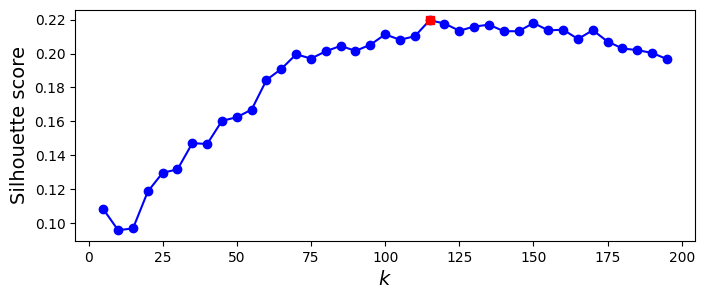

In [166]:
# Silhouette
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

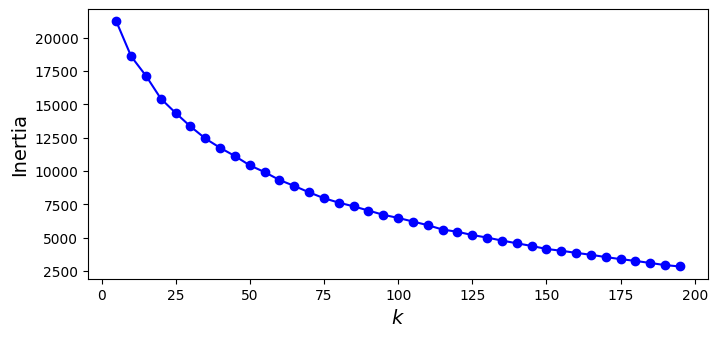

In [167]:
# Elbow
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()